In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("combined_data.csv")
df.head()

Unnamed: 0  index  z symbol  n  a  radius_val  radius_unc  N-Z  \
0           0      0  0      n  1  1     -0.1149      0.0027    1   
1           1      1  1      H  0  1      0.8783      0.0086   -1   
2           2      2  1      H  1  2      2.1421      0.0088    0   
3           3      3  1      H  2  3      1.7591      0.0363    1   
4           4      4  2     He  1  3      1.9661      0.0030   -1   

    MASS EXCESS  MASS EXCESS UNC  BINDING ENERGY/A  BINDING ENERGY UNC  \
0   8071.318060         0.000440           0.00000              0.0000   
1   7288.971064         0.000013           0.00000              0.0000   
2  13135.722895         0.000015        1112.28310              0.0002   
3  14949.810900         0.000080        2827.26540              0.0003   
4  14931.218880         0.000060        2572.68044              0.0001   

    ATOMIC MASS  ATOMIC MASS UNC    jp   half_life [s]   decay  radioactive  
0  1.008665e+06         0.000470  1/2+    6.139000e+02      B-          1.0  
1  1.007825e+06         0.000014  1/2+    3.441658e+29  stable          0.0  
2  2.014102e+06         0.000015    1+    3.441658e+29  stable          0.0  
3  3.016049e+06         0.000080  1/2+    3.887813e+08      B-          1.0  
4  3.016029e+06         0.000060  1/2+    3.441658e+29  stable          0.0

In [3]:
df.drop(columns=["Unnamed: 0",],axis=1,inplace=True) # this is an extra index column
df_no_unc = df.drop(columns=["radius_unc", "MASS EXCESS UNC", "BINDING ENERGY UNC", "ATOMIC MASS UNC"],axis=1) # don't worry about uncertainties to start
df_no_unc.describe()

index           z           n           a  radius_val         N-Z  \
count  957.000000  957.000000  957.000000  957.000000  957.000000  957.000000   
mean   478.000000   54.748171   76.220481  130.968652    4.689252   21.472309   
std    276.406404   23.598461   36.057028   59.404798    0.830347   13.603797   
min      0.000000    0.000000    0.000000    1.000000   -0.114900   -4.000000   
25%    239.000000   38.000000   51.000000   90.000000    4.261100   10.000000   
50%    478.000000   56.000000   80.000000  137.000000    4.849600   21.000000   
75%    717.000000   76.000000  105.000000  182.000000    5.380500   31.000000   
max    956.000000   96.000000  152.000000  248.000000    5.904800   56.000000   

        MASS EXCESS  BINDING ENERGY/A   ATOMIC MASS   half_life [s]  \
count    957.000000        957.000000  9.570000e+02    9.570000e+02   
mean  -50015.910316       8147.680713  1.309150e+08    3.441658e+29   
std    34668.444214        694.654949  5.941365e+07    7.853791e+30   
min   -91652.843000          0.000000  1.007825e+06    8.750000e-03   
25%   -78144.769000       7912.066600  8.990714e+07    1.440000e+02   
50%   -61012.171000       8237.928600  1.369146e+08    3.358800e+04   
75%   -26937.498000       8509.612000  1.819747e+08    3.441658e+29   
max    67392.748000       8794.555500  2.480723e+08    2.430000e+32   

       radioactive  
count   957.000000  
mean      0.743992  
std       0.436655  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [72]:
print(np.median(df["a"]))

137.0


In [4]:
#sns.pairplot(df_no_unc, hue="radioactive", kind="reg",diag_kind="hist")

Needs to be z-scaled

In [6]:
from sklearn.preprocessing import StandardScaler
df_no_unc_subset = df_no_unc[["radius_val","MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"]]
df_no_unc_subset[" half_life [s]"] = np.log(df_no_unc_subset[" half_life [s]"]) # make log scale due to variation in values
scaler = StandardScaler()
scaler.fit(df_no_unc_subset)
standardized = scaler.transform(df_no_unc_subset)
df_scaled = pd.DataFrame(standardized,columns=["radius_val","MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"])

df_scaled = pd.concat([df_scaled, df_no_unc[['z', 'n', 'a', 'N-Z', ' jp', ' decay', 'radioactive']]], axis=1)
df_scaled.head()

C:\Users\docke\AppData\Local\Temp\ipykernel_8660\3398253847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_unc_subset[" half_life [s]"] = np.log(df_no_unc_subset[" half_life [s]"]) # make log scale due to variation in values


radius_val  MASS EXCESS  BINDING ENERGY/A  ATOMIC MASS   half_life [s]  z  \
0   -5.788740     1.676383        -11.735238    -2.187615       -0.689293  0   
1   -4.591989     1.653805        -11.735238    -2.187630        1.555245  1   
2   -3.069179     1.822541        -10.133198    -2.170684        1.555245  1   
3   -3.530673     1.874895         -7.663081    -2.153811       -0.202468  1   
4   -3.281249     1.874358         -8.029764    -2.153812        1.555245  2   

   n  a  N-Z    jp   decay  radioactive  
0  1  1    1  1/2+      B-          1.0  
1  0  1   -1  1/2+  stable          0.0  
2  1  2    0    1+  stable          0.0  
3  2  3    1  1/2+      B-          1.0  
4  1  3   -1  1/2+  stable          0.0

In [7]:
df_scaled.describe()

radius_val   MASS EXCESS  BINDING ENERGY/A   ATOMIC MASS  \
count  9.570000e+02  9.570000e+02      9.570000e+02  9.570000e+02   
mean   7.127701e-16 -1.484938e-16     -1.930419e-16 -2.969876e-16   
std    1.000523e+00  1.000523e+00      1.000523e+00  1.000523e+00   
min   -5.788740e+00 -1.201632e+00     -1.173524e+01 -2.187630e+00   
25%   -5.158995e-01 -8.117920e-01     -3.393589e-01 -6.905696e-01   
50%    1.932108e-01 -3.173494e-01      1.299855e-01  1.010331e-01   
75%    8.329163e-01  6.660374e-01      5.212955e-01  8.598433e-01   
max    1.464669e+00  3.388385e+00      9.317043e-01  1.972925e+00   

        half_life [s]           z           n           a         N-Z  \
count    9.570000e+02  957.000000  957.000000  957.000000  957.000000   
mean     5.939751e-17   54.748171   76.220481  130.968652   21.472309   
std      1.000523e+00   23.598461   36.057028   59.404798   13.603797   
min     -1.095939e+00    0.000000    0.000000    1.000000   -4.000000   
25%     -7.421354e-01   38.000000   51.000000   90.000000   10.000000   
50%     -5.434464e-01   56.000000   80.000000  137.000000   21.000000   
75%      1.555245e+00   76.000000  105.000000  182.000000   31.000000   
max      1.794297e+00   96.000000  152.000000  248.000000   56.000000   

       radioactive  
count   957.000000  
mean      0.743992  
std       0.436655  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

Problem columns: half_life

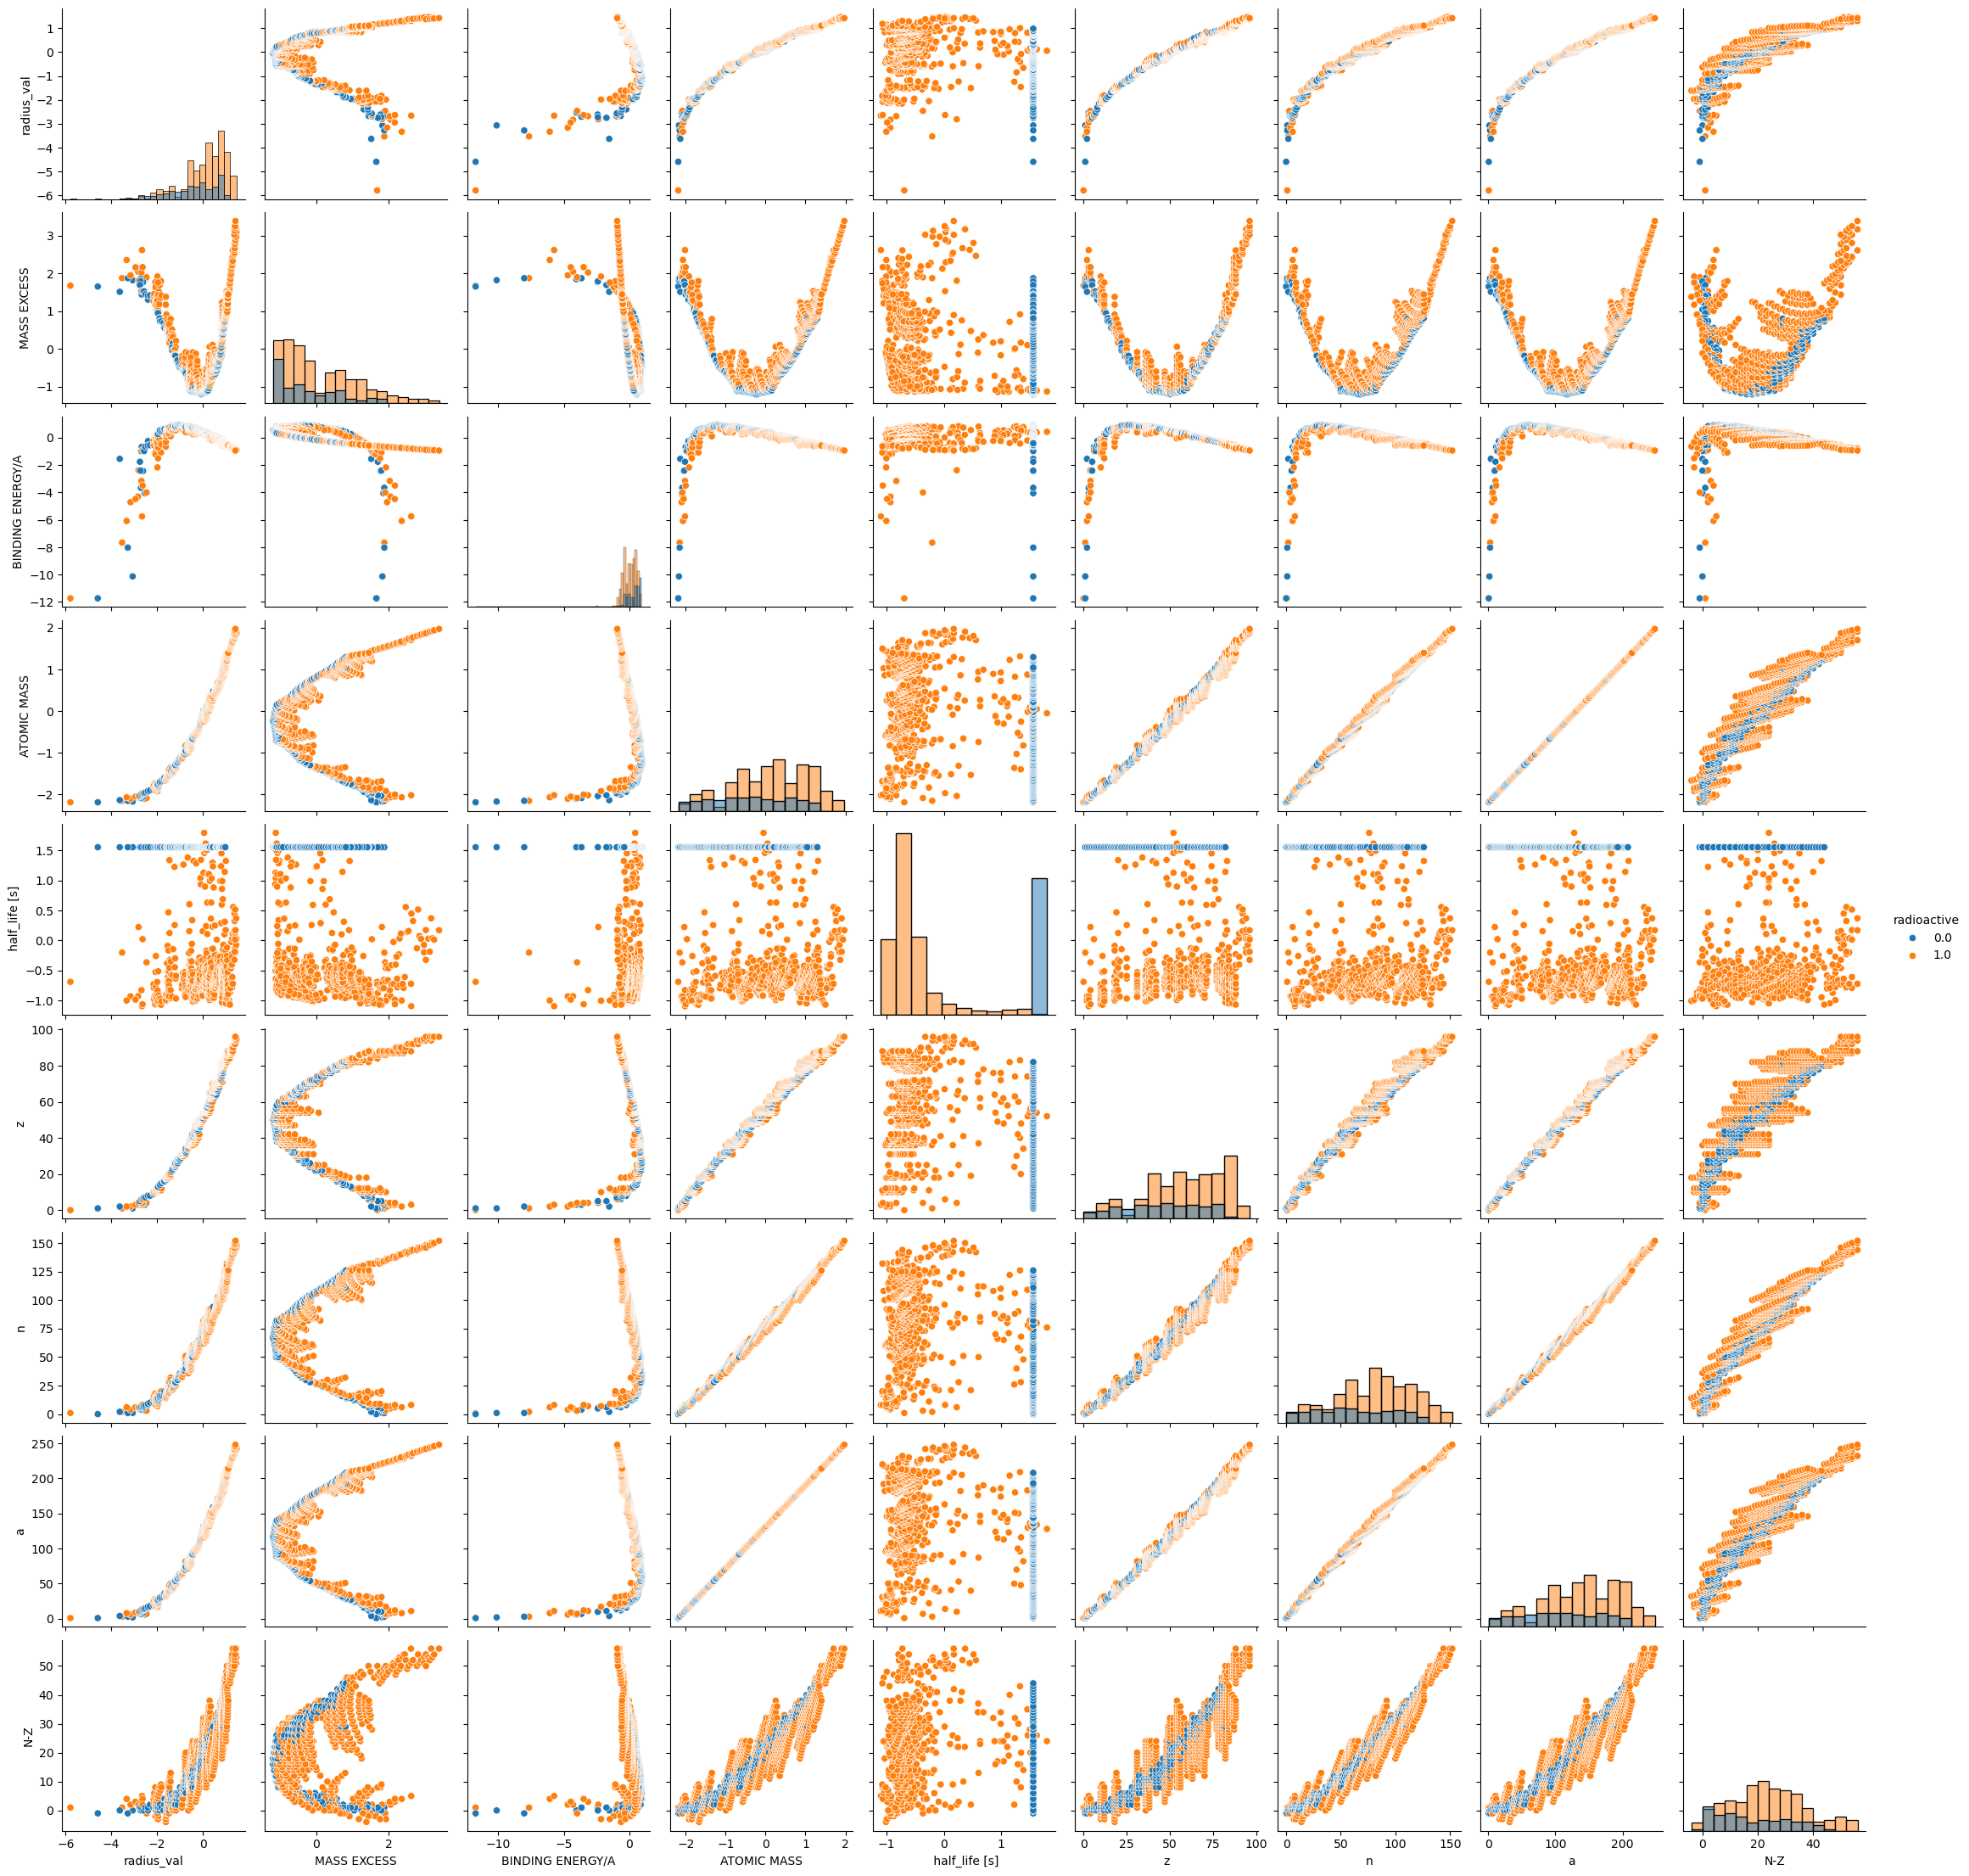

In [9]:
sns.pairplot(df_scaled, hue="radioactive", kind="scatter",diag_kind="hist")

In [74]:
df_scaled_lowmass = df_scaled[df_scaled["n"] >= 18]
df_scaled_lowmass = df_scaled_lowmass[df_scaled_lowmass["n"] <= 30]

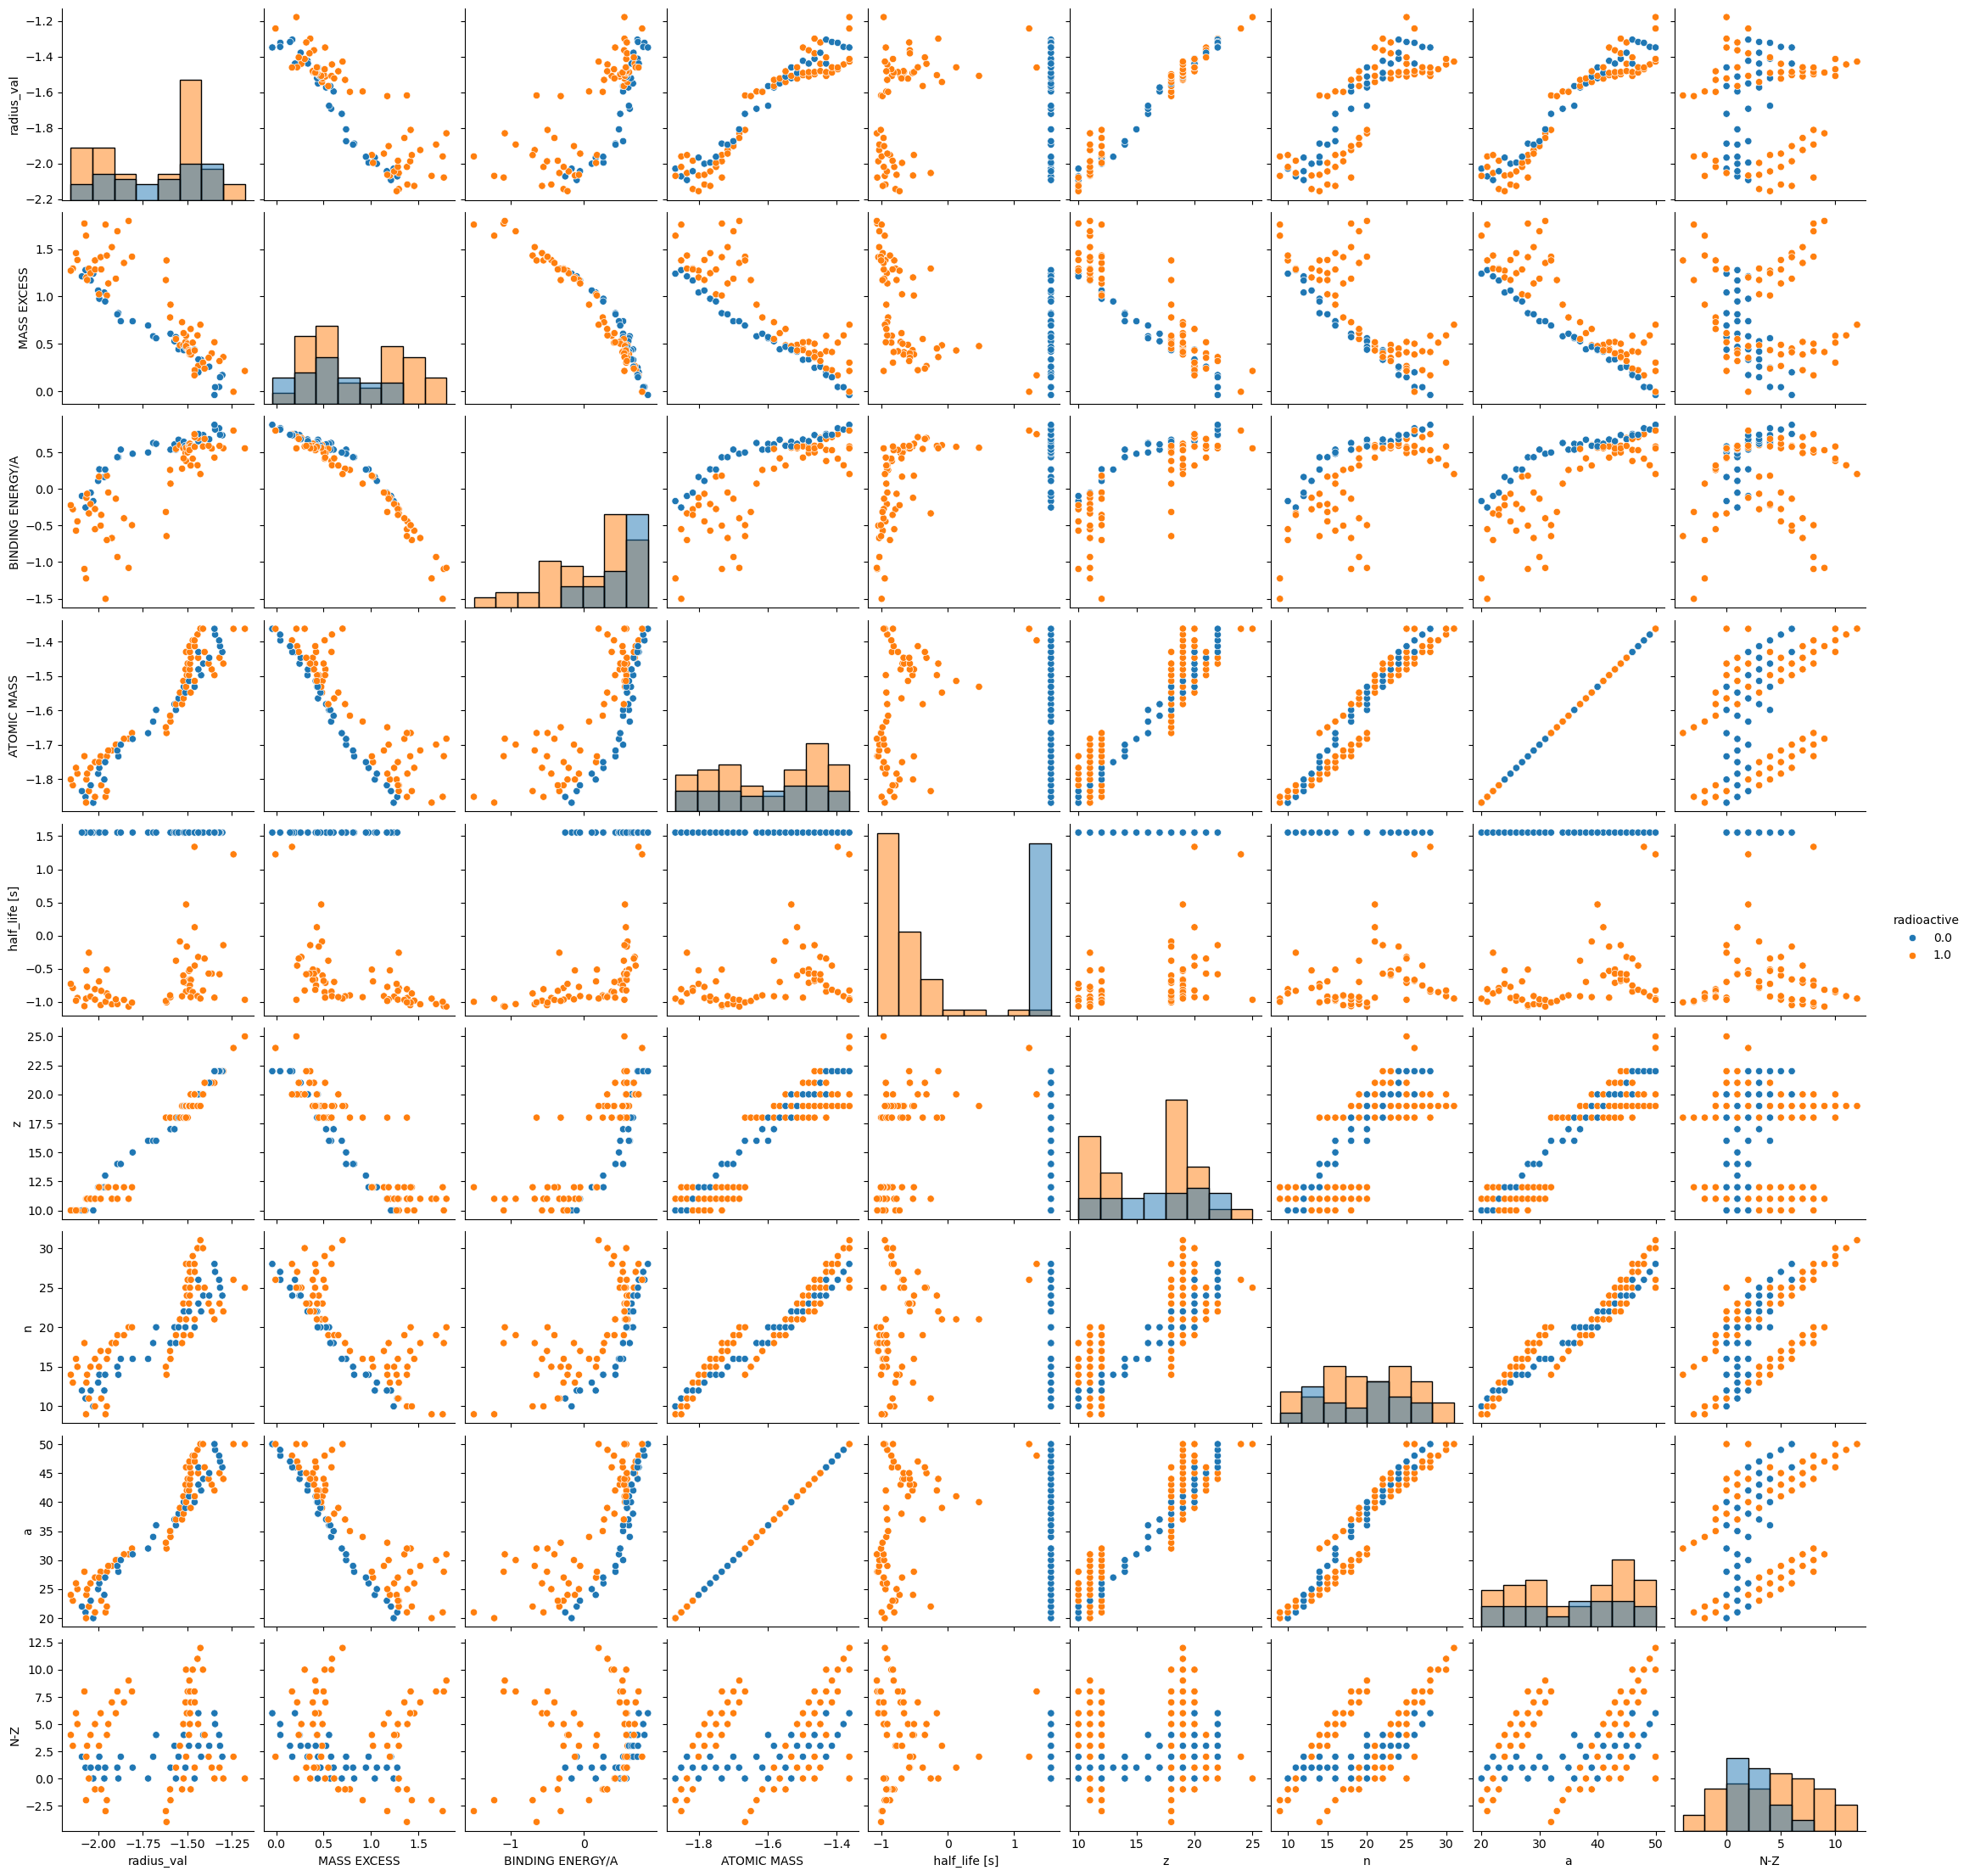

In [11]:
sns.pairplot(df_scaled_lowmass, hue="radioactive", kind="scatter",diag_kind="hist")

<Axes: xlabel='radius_val', ylabel='Count'>

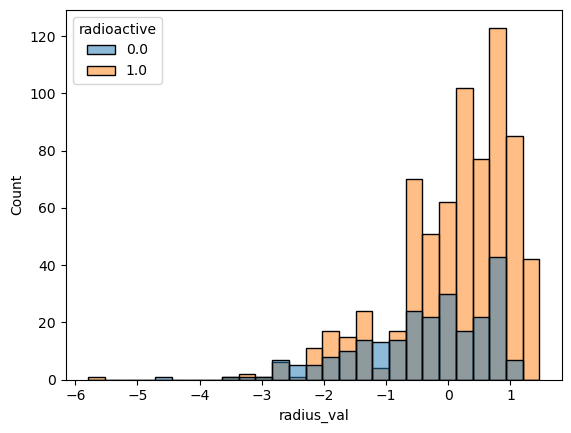

In [50]:
sns.histplot(df_scaled,x="radius_val",hue="radioactive")

<Axes: xlabel='radius_val', ylabel='Density'>

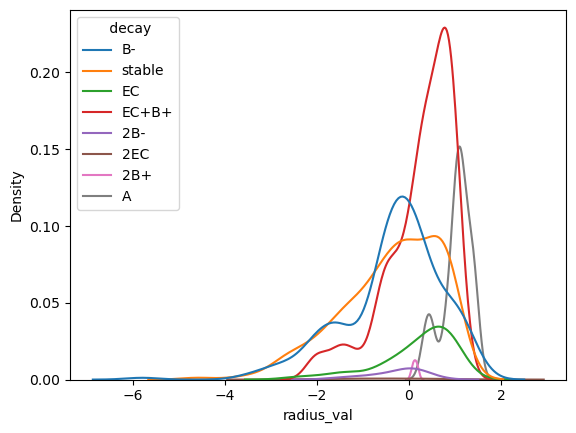

In [52]:
sns.kdeplot(df_scaled,x="radius_val",hue=" decay")

<Axes: xlabel=' decay', ylabel='radius_val'>

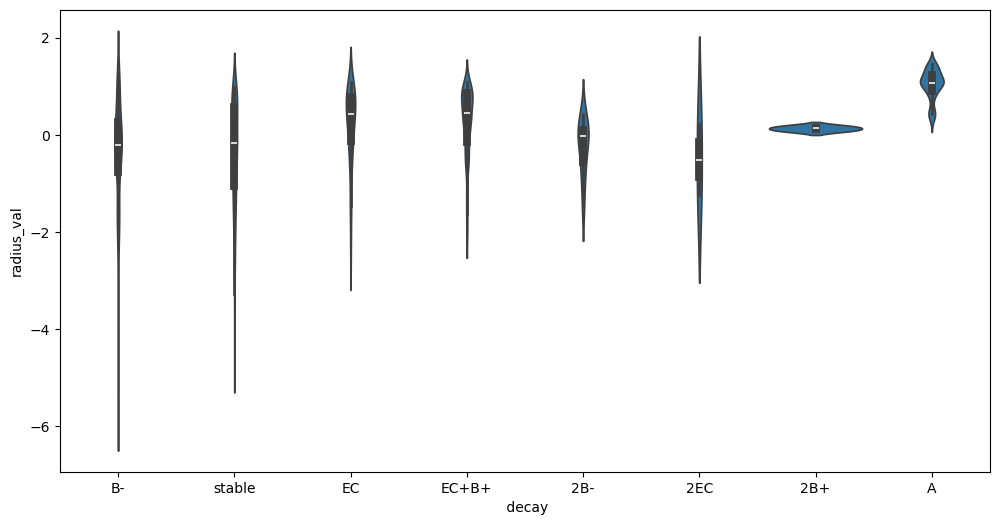

In [70]:
plt.figure(figsize=(12,6))
sns.violinplot(df_scaled,x=" decay",y="radius_val")

(array([  1.,   1.,   1.,   6.,  19.,  81.,  71., 222., 276., 279.]),
 array([-5.78874033, -5.06339939, -4.33805844, -3.6127175 , -2.88737656,
        -2.16203562, -1.43669467, -0.71135373,  0.01398721,  0.73932815,
         1.4646691 ]),
 <BarContainer object of 10 artists>)

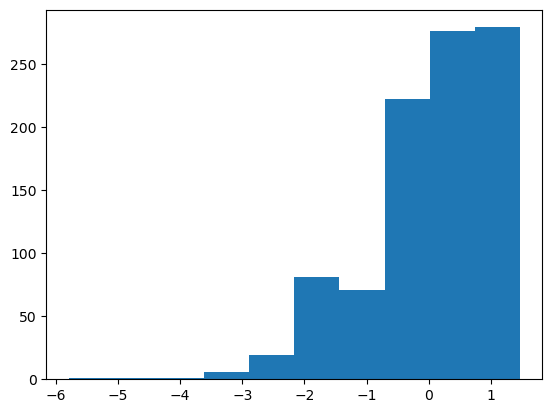

In [13]:
plt.hist(df_scaled["radius_val"])

In [76]:
import altair as alt
alt.Chart(df_scaled_lowmass).mark_point().encode(
    x='n',
    y='radius_val',
    color='z:N',
    tooltip=['a', 'radius_val', 'z', 'n']
).interactive()

alt.Chart(...)

In [42]:
alt.Chart(df_scaled).mark_point().encode(
    x='a',
    y='radius_val',
    color=' decay',
    tooltip=['a', 'radius_val', 'z', 'n', ' decay']
).interactive()

alt.Chart(...)

In [44]:
alt.Chart(df_scaled).mark_point().encode(
    x='MASS EXCESS',
    y='radius_val',
    color=' decay',
    tooltip=['MASS EXCESS', 'radius_val', 'z', 'n', ' decay', ]
).interactive()

alt.Chart(...)

In [46]:
alt.Chart(df_scaled).mark_point().encode(
    x='BINDING ENERGY/A',
    y='radius_val',
    color=' decay',
    tooltip=['BINDING ENERGY/A', 'radius_val', 'z', 'n', ' decay']
).interactive()

alt.Chart(...)

In [48]:
alt.Chart(df_scaled_lowmass).mark_point().encode(
    x='a',
    y='radius_val',
    color=' decay',
    tooltip=['a', 'radius_val', 'z', 'n']
).interactive()

alt.Chart(...)